In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(808, 766, 3)

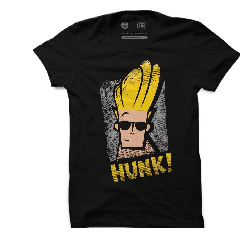

In [3]:
plt.figure()
plt.axis("off")
plt.imshow(image)

In [4]:
image.shape

(808, 766, 3)

In [5]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
print (image)
print (image.shape)

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ..., 
 [255 255 255]
 [255 255 255]
 [255 255 255]]
(618928, 3)


In [6]:
from sklearn.cluster import KMeans
K = 4
clf = KMeans(n_clusters=K)
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
#initialising the label dictionary
label = [0, 0, 0,0]

#finding count of data in each cluster
for x in clf.labels_:
    label[x] += 1

#Total Number of data points
label_sum = image.shape[0]

#converting to percentage
label = [float(x) / label_sum for x in label]
print (label)

[0.3135356616601608, 0.5837286404880697, 0.05690645761704108, 0.04582924023472843]


[[254, 254, 254], [21, 21, 20], [209, 176, 77], [119, 113, 99]]
['#fefefe', '#151514', '#d1b04d', '#777163']
[[ 254.15024529  254.14804489  254.14684936]
 [  21.47326043   21.04039515   20.38713356]
 [ 209.90748836  176.34316453   77.64942659]
 [ 119.58403554  113.53111448   99.4114868 ]]


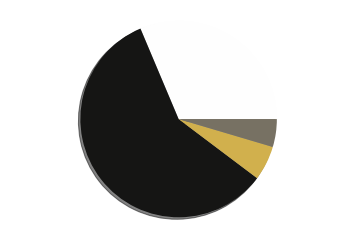

In [8]:
import webcolors

centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]
print(centroids)

clr = [webcolors.rgb_to_hex(c) for c in centroids]
print(clr)
print(clf.cluster_centers_)
#print(webcolors.rgb_to_name([255,255,254]))
plt.pie(label, colors=clr, shadow=True) 
plt.axis('equal')
plt.show()

In [15]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from sklearn.cluster import KMeans
import operator
import webcolors

mypath='Dominant Color Data Set/'
files = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
p=[]
onlyfiles=[]
for i in files:
    k=int(i[6:i.index(".")])
    p.append(k)
p.sort()
for i in p:
    onlyfiles.append("image "+str(i)+".jpg")
    
print(onlyfiles)
images = numpy.empty(len(onlyfiles), dtype=object)
max_percentage = []
color = []
image_name = []
count = 1
for n in range(0, len(onlyfiles)):
    image_name.append(str(count))
    
    images[n] = cv2.imread( join(mypath,onlyfiles[n]) )
    image = images[n]
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1]),3)
    
    K=4
    clf = KMeans(n_clusters = K)
    clf.fit(image)
    
    label = [0,0,0,0]
    for ele in clf.labels_:
        label[ele] += 1
    label_sum = image.shape[0]
    label = [(float(ele)/label_sum)*100 for ele in label]
    
    # to access max value along with index from a list
    index, value = max(enumerate(label), key=operator.itemgetter(1))
    max_percentage.append(value)
    
    centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]
    clr = [webcolors.rgb_to_hex(c) for c in centroids]
    color.append(clr[index])
    count += 1

['image 1.jpg', 'image 2.jpg', 'image 3.jpg', 'image 4.jpg', 'image 5.jpg', 'image 6.jpg', 'image 7.jpg', 'image 8.jpg', 'image 9.jpg', 'image 10.jpg']


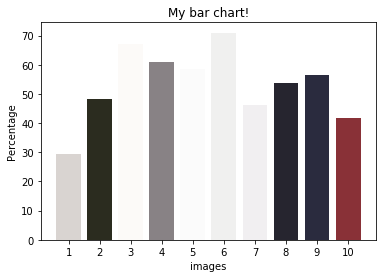

In [16]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars 
left = [1,2,3,4,5,6,7,8,9,10]
 
# heights of bars
height = max_percentage
 
# labels for bars
tick_label = image_name
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = color)
 
# naming the x-axis
plt.xlabel('images')
# naming the y-axis
plt.ylabel('Percentage')
# plot title
plt.title('My bar chart!')
 
# function to show the plot
plt.show()